In [2]:
#XGBoost
import pandas as pd
import numpy as np
import shap

In [3]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [5]:
%matplotlib inline

In [6]:
from os.path import dirname, join
from pathlib import Path
ROOT_DIR = dirname(os.path.abspath('ARCH7211-SPRING2021')) # This is your Project Root
data_PATH = join(ROOT_DIR,"data","room_info.csv")  # requires `import os`

# input data
data = pd.read_csv(r'C:\Users\milad\Documents\GitHub\arch7211-spring2021\data\room_info.csv')

In [7]:
#Cleaning data and feature engineering
exclusion = ["Undefined","UserDefined","Other"]
merge = {
    "Sauna": "Bath",
    "Den":'LivingRoom',
    "Library": "Office",
    "DressingRoom":'Closet'
}

data["type_cleaned"] = data["type"].apply(lambda x: merge.get(x,x))
data["exclude"] = ~data["type"].isin(exclusion)

In [8]:
data_exclude = data[~data["type"].isin(exclusion)]

In [9]:
data_exclude.groupby("type_cleaned",as_index=False).count().sort_values("type_cleaned")

,type_cleaned,path,type,classes,floor_index,num_sides,area,proportion_floor_area,perimeter,compactness,...,contains_Sink,contains_SpaceForAppliance,contains_Stove,contains_Toilet,contains_TumbleDryer,contains_Urinal,contains_WallCabinet,contains_WashingMachine,contains_WaterTap,exclude
0,Alcove,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
1,Attic,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
2,Basement,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
3,Bath,7288,7288,7288,7288,7288,7288,7288,7288,7288,...,7288,7288,7288,7288,7288,7288,7288,7288,7288,7288
4,Bedroom,7993,7993,7993,7993,7993,7993,7993,7993,7993,...,7993,7993,7993,7993,7993,7993,7993,7993,7993,7993
5,CarPort,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
6,Closet,3041,3041,3041,3041,3041,3041,3041,3041,3041,...,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041
7,Dining,954,954,954,954,954,954,954,954,954,...,954,954,954,954,954,954,954,954,954,954
8,DraughtLobby,1667,1667,1667,1667,1667,1667,1667,1667,1667,...,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667
9,Elevated,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [46]:
#Clean input data from the target data
# define features and predictions
X = data_exclude.drop(['path','type','classes','open_to','door_to','contains','type_cleaned','exclude'], axis =1)
y = data_exclude['type_cleaned']
#Split the data into training data, and test data 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)
X_train_train , X_train_val, y_train_train, y_train_val = train_test_split(X_train,y_train, test_size= 0.5)


In [47]:
print(XGBClassifier())

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [48]:
#XGB default parameters
xgb = XGBClassifier(objective='multi:softprob',
                    n_estimators = 200,
                    subsample= 0.9,
                    colsample_bytree = 0.6)
print(xgb)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.6, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=0.9,
              tree_method=None, validate_parameters=None, verbosity=None)


In [49]:
xgb.fit(X_train,y_train,
        eval_set=[(X_train_train, y_train_train), (X_train_val, y_train_val)],
        eval_metric= ['mlogloss','merror'],
        early_stopping_rounds=10,
        verbose=True)

lidation_1-mlogloss:0.20902	validation_1-merror:0.06073
[36]	validation_0-mlogloss:0.20482	validation_0-merror:0.05950	validation_1-mlogloss:0.20609	validation_1-merror:0.06014
[37]	validation_0-mlogloss:0.20149	validation_0-merror:0.05820	validation_1-mlogloss:0.20270	validation_1-merror:0.05890
[38]	validation_0-mlogloss:0.19898	validation_0-merror:0.05796	validation_1-mlogloss:0.20020	validation_1-merror:0.05796
[39]	validation_0-mlogloss:0.19645	validation_0-merror:0.05684	validation_1-mlogloss:0.19771	validation_1-merror:0.05708
[40]	validation_0-mlogloss:0.19330	validation_0-merror:0.05561	validation_1-mlogloss:0.19457	validation_1-merror:0.05637
[41]	validation_0-mlogloss:0.18989	validation_0-merror:0.05455	validation_1-mlogloss:0.19128	validation_1-merror:0.05561
[42]	validation_0-mlogloss:0.18715	validation_0-merror:0.05384	validation_1-mlogloss:0.18862	validation_1-merror:0.05484
[43]	validation_0-mlogloss:0.18494	validation_0-merror:0.05307	validation_1-mlogloss:0.18642	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
evals_result = xgb.evals_result()

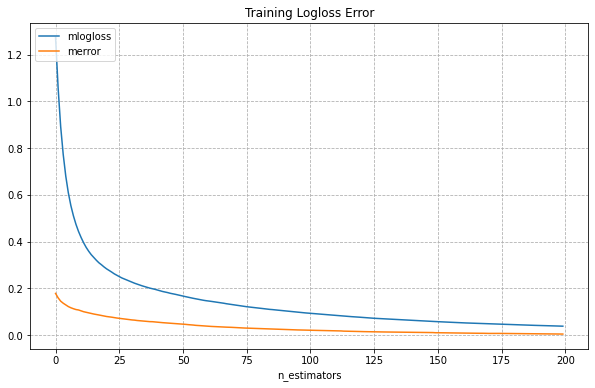

In [69]:


rcParams['figure.figsize'] = 10,6

plt.plot(evals_result.get('validation_0').get('mlogloss'))
plt.plot(evals_result.get('validation_0').get('merror'))
# plt.plot(evals_result.get('validation_1').get('mlogloss'))
plt.title('Training Logloss Error')
plt.legend(('mlogloss','merror'),loc=2)
plt.xlabel('n_estimators')
# plt.ylabel('mlogloss')
plt.grid(True, linestyle="--")
plt.savefig("mlogloss.png")
plt.show()
# plt.savefig('mlogloss_per_n_estimators.png')

In [62]:
train_score = xgb.score(X_train_train,y_train_train)
print("Training score: ",train_score)

Training score:  0.9948751178133836


In [53]:
# cv_score = cross_val_score(xgb,X_train,y_train, cv=10)
# print("CV mean score: ",cv_score.mean())

In [54]:
best_iteration = xgb.get_booster().best_ntree_limit
y_pred = xgb.predict(X_test, ntree_limit=best_iteration)
print(best_iteration)

200


In [55]:
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

        Alcove       0.75      0.55      0.63        44
         Attic       0.75      0.60      0.67        25
      Basement       0.25      0.12      0.17        16
          Bath       0.96      0.97      0.96      2191
       Bedroom       0.83      0.95      0.88      2409
       CarPort       0.75      0.56      0.64        80
        Closet       0.85      0.89      0.87       871
        Dining       0.88      0.85      0.87       288
  DraughtLobby       0.94      0.92      0.93       485
      Elevated       0.75      0.31      0.44        29
         Entry       0.90      0.95      0.92      1243
        Garage       0.76      0.82      0.79       122
          Hall       0.70      0.12      0.21        57
       Kitchen       0.97      0.95      0.96      1399
    LivingRoom       0.84      0.91      0.88      1244
        Office       0.25      0.04      0.07        52
       Outdoor       0.96      0.97      0.96  

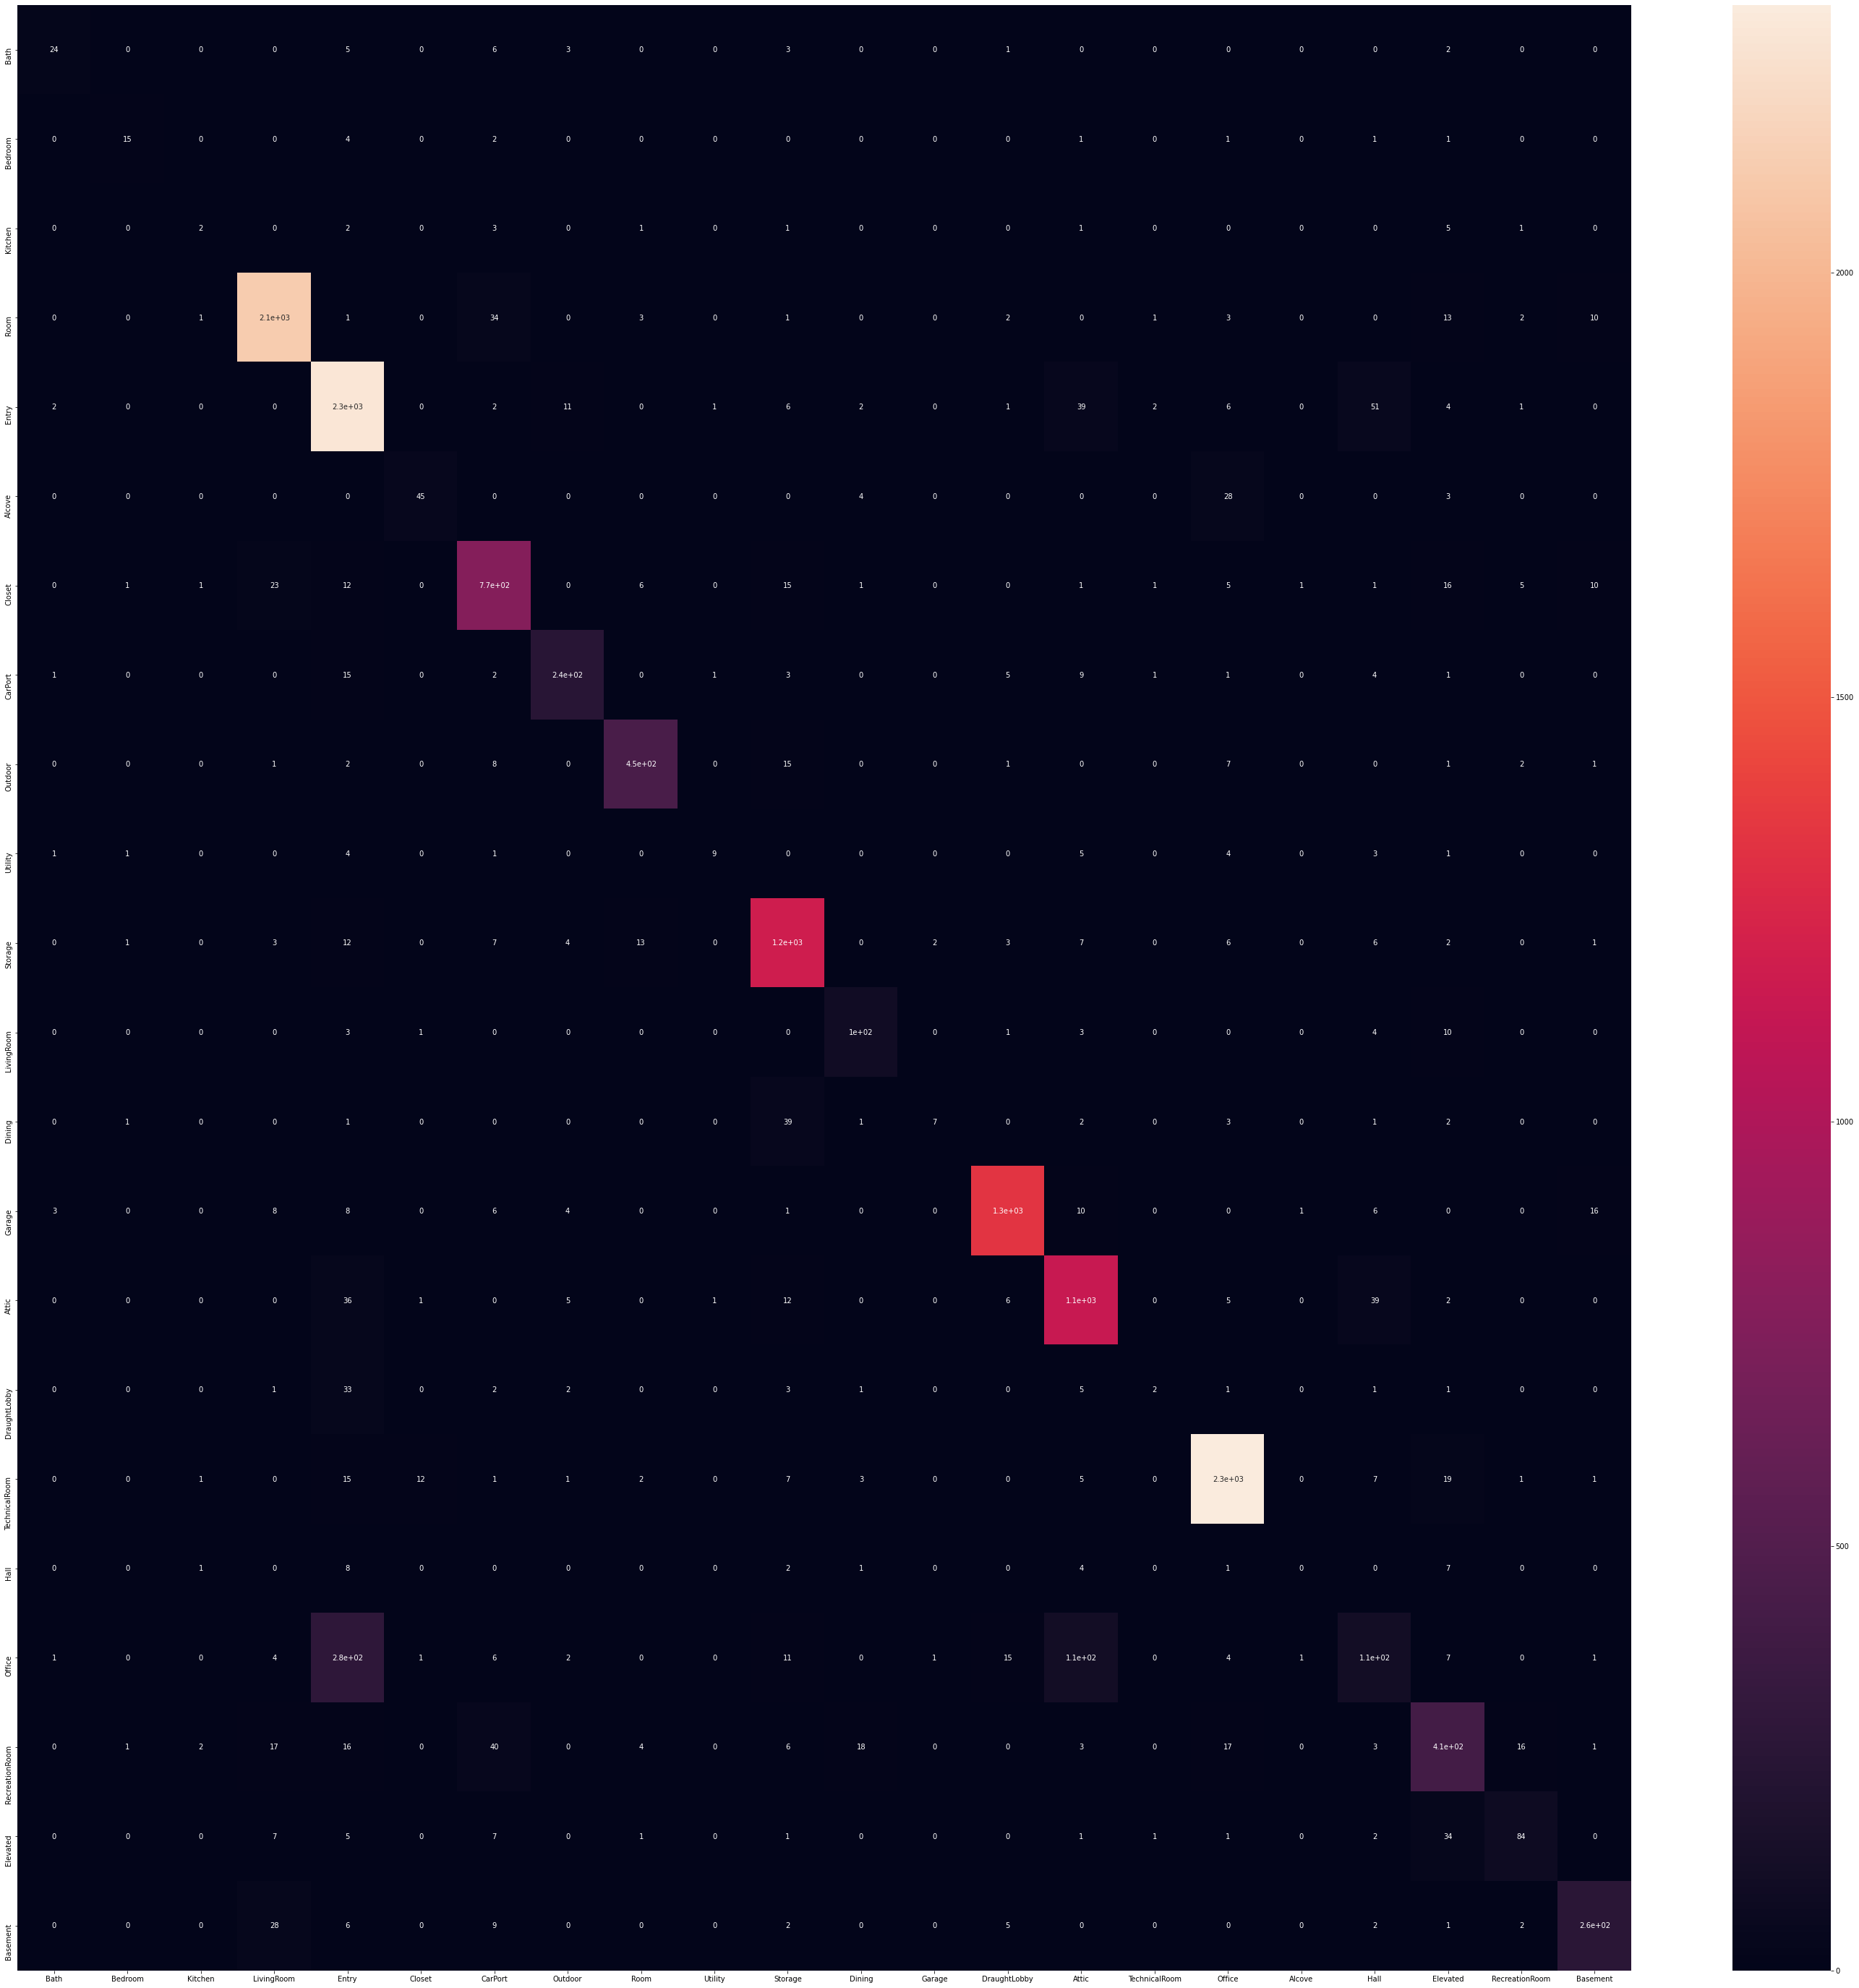

In [73]:
cMat = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(data = cMat , index= pd.Series(y_test).unique() , columns= pd.Series(y_pred).unique())
# df_cm = pd.DataFrame(data = cMat)
# df_cm.head()
plt.figure(figsize= (50,50))
sns.heatmap(df_cm, annot=True)
plt.savefig('XGBoost_CM.png', dpi=100)
plt.show()


In [57]:
f_import = list(zip(X_train_train,xgb.feature_importances_))
for name,score in sorted(f_import, key = lambda x: x[1], reverse = True):
    print(name,score)

contains_Refrigerator 0.283736
contains_Shower 0.21988718
contains_Stove 0.059283745
contains_Sink 0.033315036
contains_Toilet 0.022755835
open_to_Entry 0.022506827
contains_BaseCabinet 0.021009943
contains_WashingMachine 0.020402255
contains_CoatCloset 0.017080635
num_adjacent_rooms 0.015988523
door_to_Closet 0.015395761
num_adjacent_walls 0.012837797
contains_Heater 0.012759462
num_doors 0.012435201
open_to_Kitchen 0.011783969
door_to_Sauna 0.009248302
open_to_LivingRoom 0.008117081
door_to_Bedroom 0.008103788
door_to_Bath 0.007924854
contains_Closet 0.007780436
contains_Fireplace 0.0074259704
door_to_CarPort 0.0073448764
num_adjacent_railings 0.006721511
open_to_Dining 0.00581835
door_to_Outdoor 0.005530913
num_windows 0.0053658853
contains_SaunaStove 0.005286931
contains_SaunaBench 0.0049306564
num_fixtures 0.0045560095
num_connected_rooms 0.004427777
door_to_Attic 0.004409429
door_to_Entry 0.0042903614
open_to_Outdoor 0.0038318483
area 0.0037847783
contains_GEA 0.003769924
contain

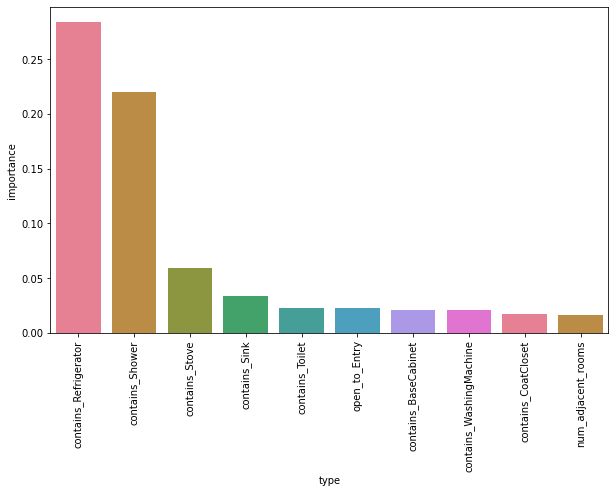

In [71]:
feat_imp = pd.DataFrame(data= {'type':[x[0] for x in f_import] , 'importance':[x[1] for x in f_import]}).sort_values('importance', ascending= False)
feat_imp
fig1 = sns.barplot(x='type',y='importance',data= feat_imp.head(10), palette=sns.color_palette("husl", 8))
plt.xticks(rotation=90)
plt.savefig('feature_imprt.png')
plt.show()
# sns.lineplot((x[0] for x in f_import) , (x[1] for x in f_import) )

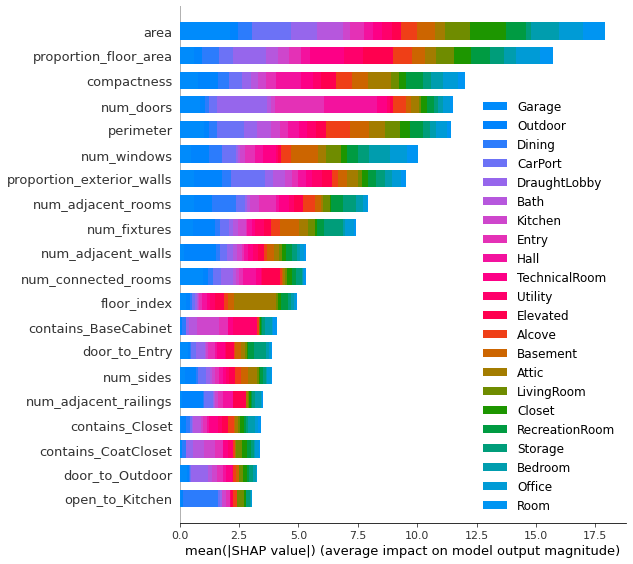

<Figure size 720x432 with 0 Axes>

In [74]:
shap_values = shap.TreeExplainer(xgb).shap_values(X_train_train)
shap.summary_plot(shap_values, X_train_train, plot_type="bar",class_names=xgb.classes_, title='XGBoost Feature Importance')
plt.show()

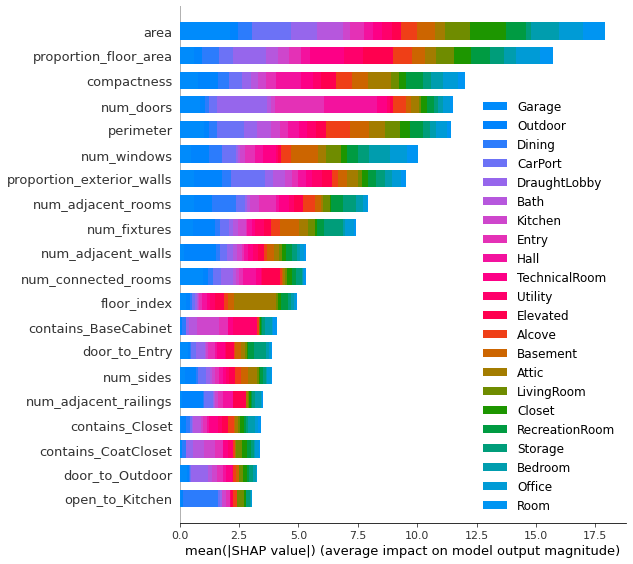

<Figure size 720x432 with 0 Axes>

In [75]:
shap.summary_plot(shap_values, X_train_train,class_names=xgb.classes_, title='XGBoost Feature Importance')
plt.savefig('feature_imprt_shap.png')

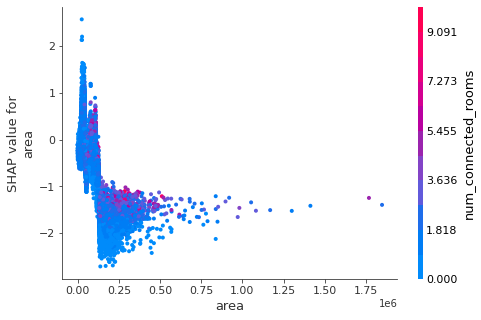

<Figure size 720x432 with 0 Axes>

In [60]:
shap.dependence_plot("area", shap_values[0], X_train_train)
plt.savefig('area_dependency.png')
plt.show()

In [22]:
#XGB default parameters
xgb = XGBClassifier(objective='multi:softprob',
                    subsample= 0.9,
                    colsample_bytree = 0.6,
                    learning_rate = 0.01,
                    max_depth=6,
                    n_estimators = 200)
print(xgb)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.6, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=6,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=0.9,
              tree_method=None, validate_parameters=None, verbosity=None)


In [32]:
xgb.fit(X_train,y_train,
        eval_set=[(X_train_train, y_train_train), (X_train_val, y_train_val)],
        eval_metric= ['mlogloss','merror'],
        early_stopping_rounds=10,
        verbose=True)

lidation_1-mlogloss:0.21139	validation_1-merror:0.05996
[36]	validation_0-mlogloss:0.20328	validation_0-merror:0.06026	validation_1-mlogloss:0.20821	validation_1-merror:0.05932
[37]	validation_0-mlogloss:0.19987	validation_0-merror:0.05932	validation_1-mlogloss:0.20469	validation_1-merror:0.05814
[38]	validation_0-mlogloss:0.19736	validation_0-merror:0.05849	validation_1-mlogloss:0.20212	validation_1-merror:0.05767
[39]	validation_0-mlogloss:0.19454	validation_0-merror:0.05726	validation_1-mlogloss:0.19905	validation_1-merror:0.05625
[40]	validation_0-mlogloss:0.19158	validation_0-merror:0.05631	validation_1-mlogloss:0.19598	validation_1-merror:0.05490
[41]	validation_0-mlogloss:0.18857	validation_0-merror:0.05561	validation_1-mlogloss:0.19299	validation_1-merror:0.05431
[42]	validation_0-mlogloss:0.18603	validation_0-merror:0.05478	validation_1-mlogloss:0.19056	validation_1-merror:0.05331
[43]	validation_0-mlogloss:0.18379	validation_0-merror:0.05378	validation_1-mlogloss:0.18832	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
evals_result = xgb.evals_result()

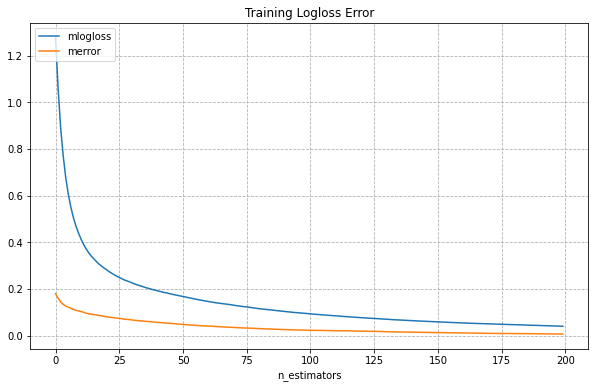

In [34]:
rcParams['figure.figsize'] = 10,6
plt.plot(evals_result.get('validation_0').get('mlogloss'))
plt.plot(evals_result.get('validation_0').get('merror'))
# plt.plot(evals_result.get('validation_1').get('mlogloss'))
plt.title('Training Logloss Error')
plt.legend(('mlogloss','merror'),loc=2)
plt.xlabel('n_estimators')
# plt.ylabel('mlogloss')
plt.grid(True, linestyle="--")
plt.show()

In [35]:
best_iteration = xgb.get_booster().best_ntree_limit
y_pred = xgb.predict(X_test, ntree_limit=best_iteration)
print(best_iteration)

199


In [36]:
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

        Alcove       0.77      0.70      0.73        47
         Attic       0.72      0.43      0.54        30
      Basement       0.40      0.12      0.18        17
          Bath       0.96      0.97      0.97      2151
       Bedroom       0.83      0.95      0.89      2419
       CarPort       0.73      0.66      0.69        82
        Closet       0.87      0.88      0.88       953
        Dining       0.86      0.85      0.85       266
  DraughtLobby       0.91      0.92      0.92       524
      Elevated       0.75      0.46      0.57        26
         Entry       0.90      0.94      0.92      1200
        Garage       0.77      0.82      0.79       115
          Hall       0.60      0.14      0.23        42
       Kitchen       0.97      0.95      0.96      1340
    LivingRoom       0.85      0.91      0.88      1286
        Office       0.14      0.02      0.03        55
       Outdoor       0.97      0.97      0.97  

<AxesSubplot:>

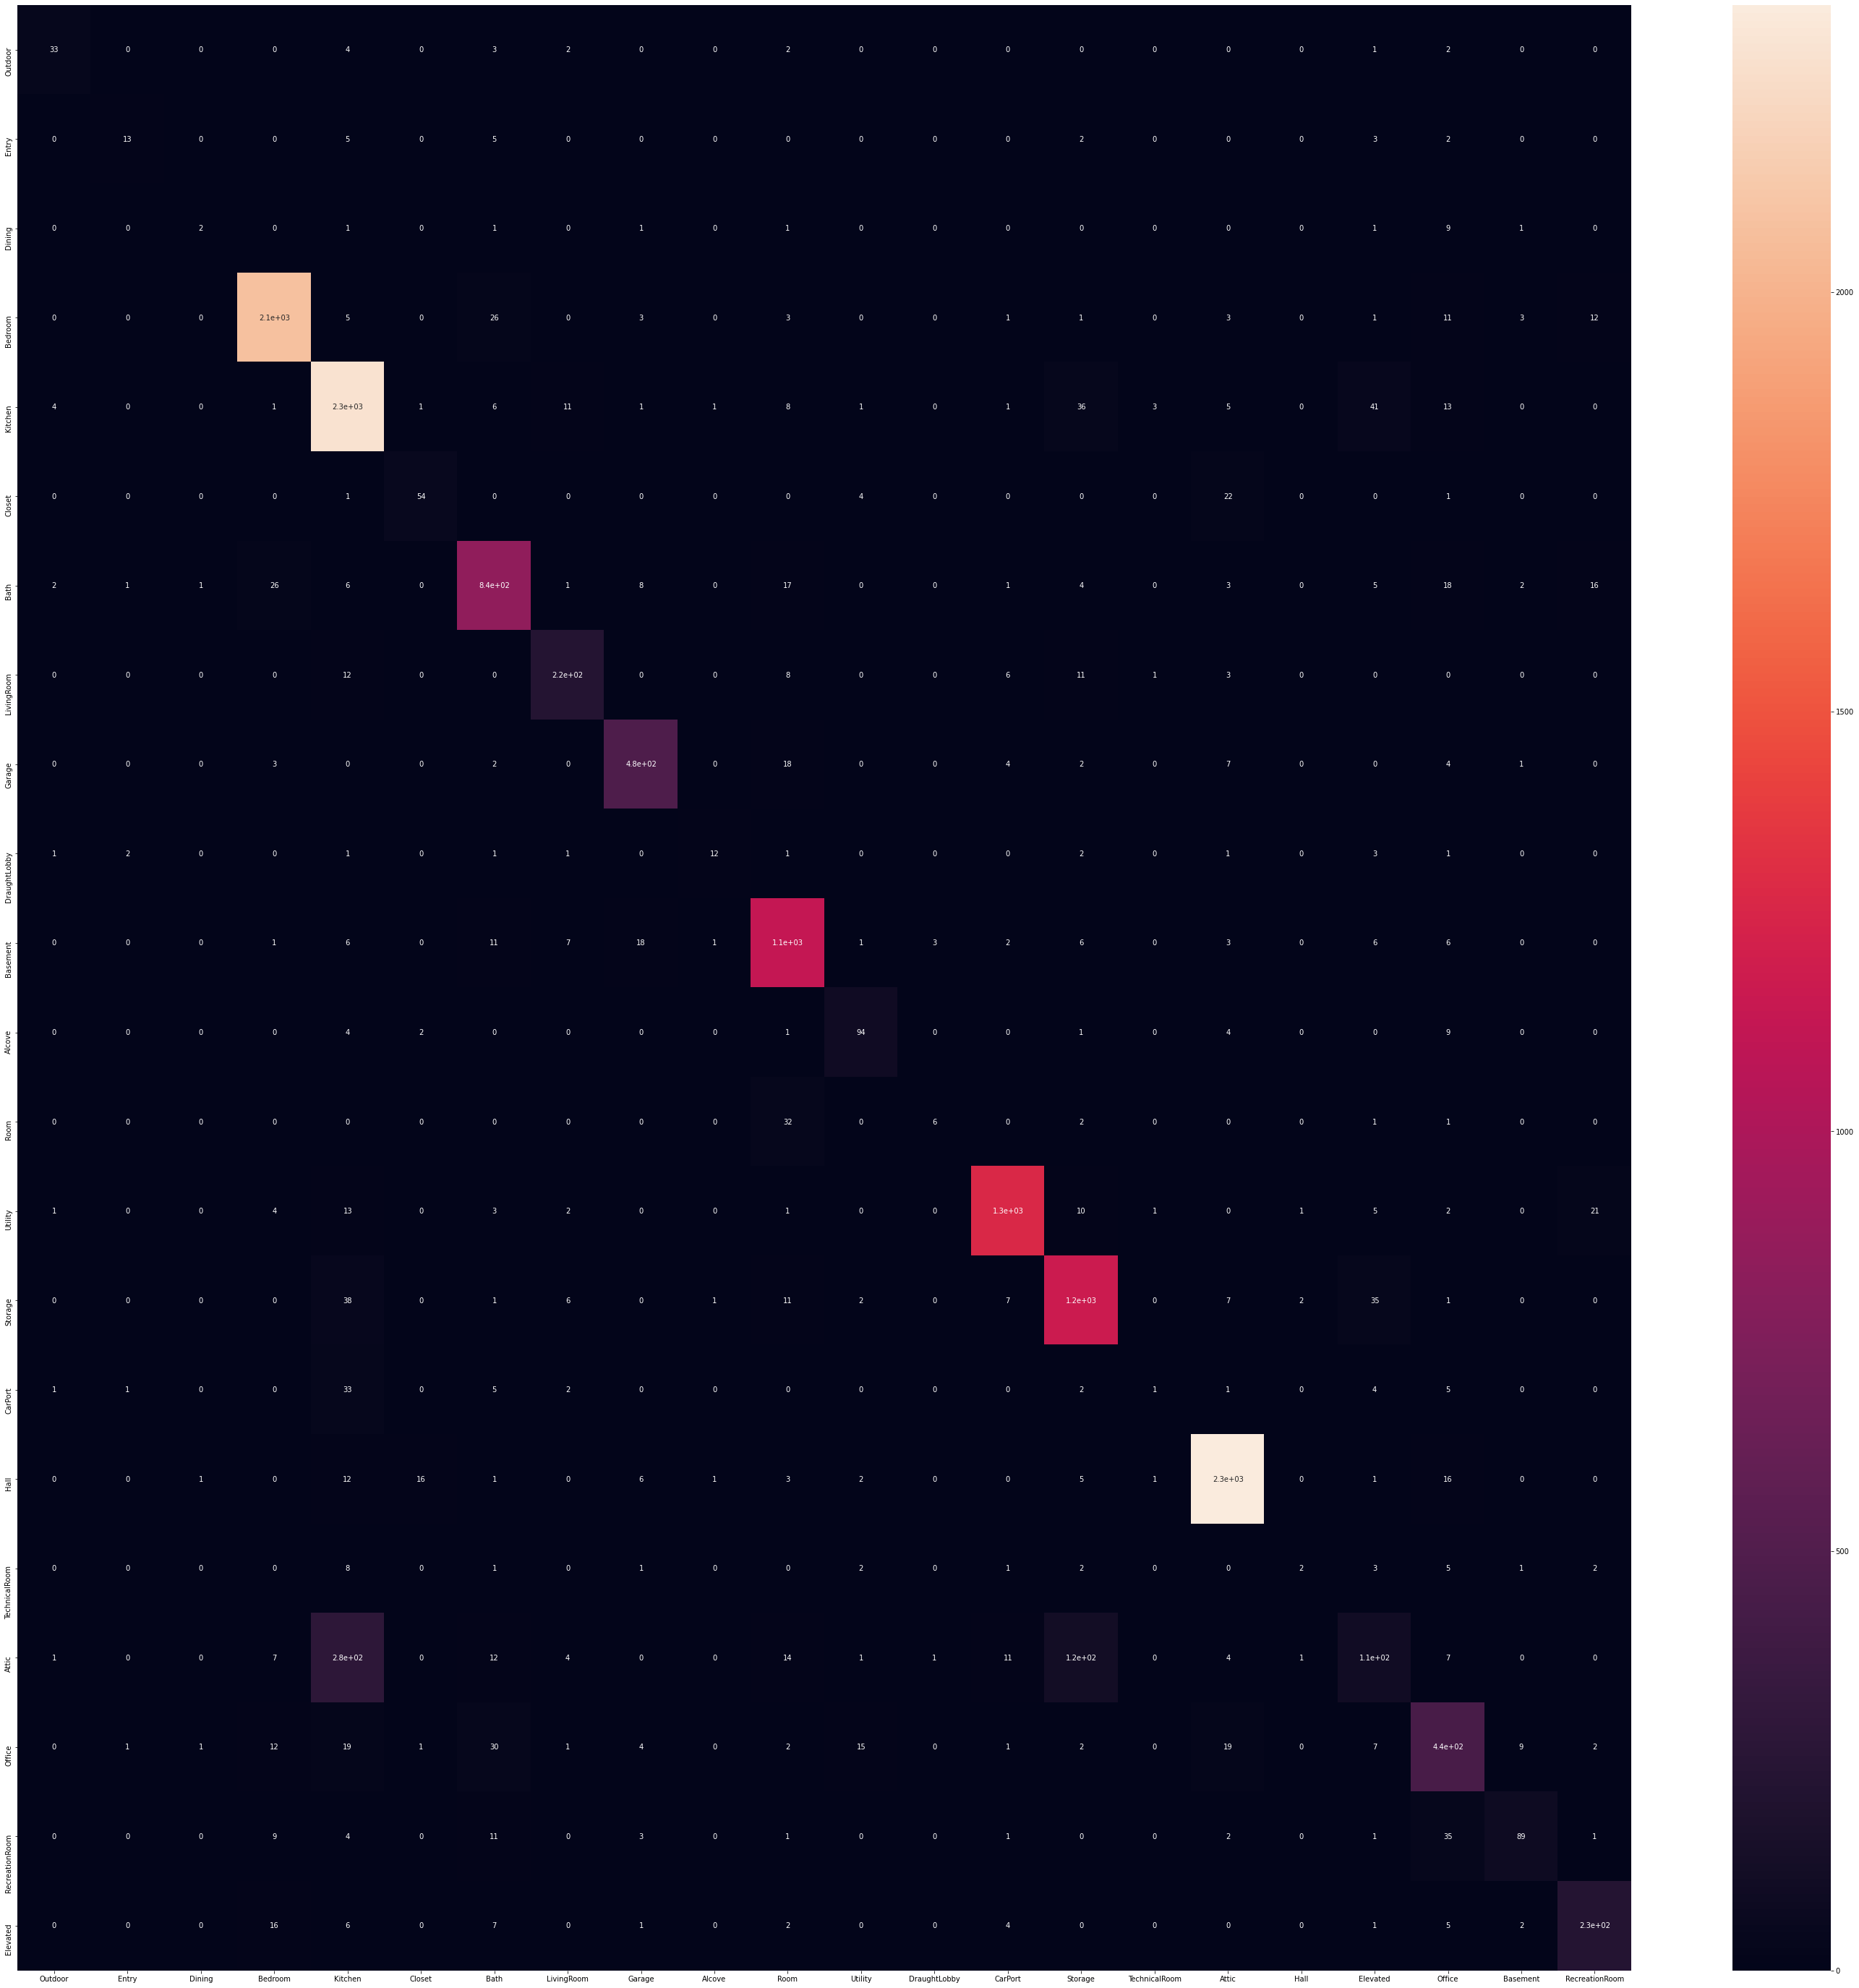

In [37]:
cMat = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(data = cMat , index= pd.Series(y_test).unique() , columns= pd.Series(y_pred).unique())
# df_cm = pd.DataFrame(data = cMat)
# df_cm.head()
plt.figure(figsize= (50,50))
sns.heatmap(df_cm, annot=True)

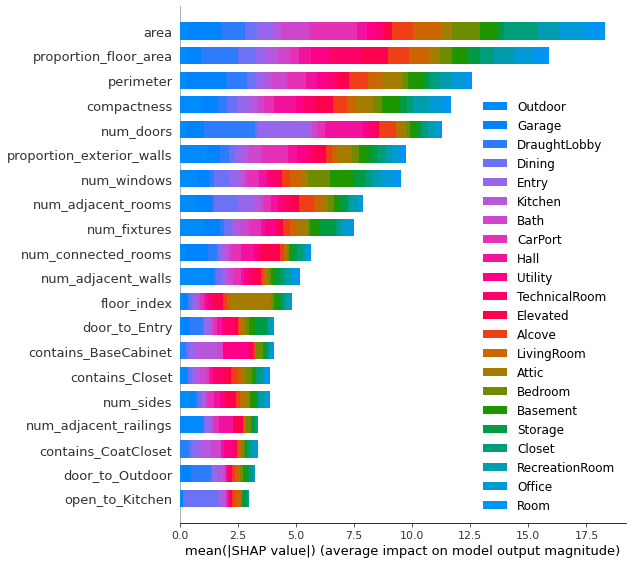

In [41]:
shap_values = shap.TreeExplainer(xgb).shap_values(X_train_train)
shap.summary_plot(shap_values, X_train_train, plot_type="bar",class_names=xgb.classes_, title='XGBoost Feature Importance')

In [39]:
f_import = list(zip(X_train_train,xgb.feature_importances_))
for name,score in sorted(f_import, key = lambda x: x[1], reverse = True):
    print(name,score)

contains_Refrigerator 0.2709223
contains_Shower 0.20535102
contains_Stove 0.061983813
contains_Sink 0.03404105
contains_BaseCabinet 0.024960417
contains_WashingMachine 0.0232702
open_to_Entry 0.022279875
contains_Toilet 0.021463986
contains_CoatCloset 0.016392183
door_to_Closet 0.016343055
num_adjacent_rooms 0.015284381
open_to_Kitchen 0.013627568
contains_Heater 0.013026055
num_adjacent_walls 0.01289855
num_doors 0.012882446
contains_Fireplace 0.011908927
open_to_LivingRoom 0.010368432
door_to_Sauna 0.009633447
door_to_CarPort 0.008354127
door_to_Bath 0.008176528
door_to_Bedroom 0.0081661185
contains_SaunaStove 0.0074288864
contains_Closet 0.0074144187
num_adjacent_railings 0.007105237
contains_SaunaBench 0.006422634
open_to_Dining 0.0063610766
num_windows 0.0053834524
num_fixtures 0.0053372644
door_to_Outdoor 0.0053337505
door_to_Entry 0.0044642654
num_connected_rooms 0.00445829
open_to_Alcove 0.004170706
open_to_Outdoor 0.0041549946
area 0.0038964567
contains_GEA 0.003691835
contain

In [13]:
#Reproductability
seed = 342
np.random.seed(seed)

In [27]:
#Grid Search

#Define CV strategy:
cv = StratifiedKFold(n_splits=5 , shuffle=True, random_state=seed)
#params_grid
params_grid = {
    'max_depth' : [1,3,6],
    'n_estimators' : [200,400],
    'learning_rate' : [0.01, 1] 
                }
params_fixed = {
    'objective' : 'multi:softprob',
                }
bst_grid = GridSearchCV(estimator=XGBClassifier(**params_fixed, seed=seed),param_grid=params_grid, cv = cv, scoring='f1_macro')

In [28]:
fit_params = {
        'eval_set':[(X_train, y_train), (X_test, y_test)],
        'eval_metric':['mlogloss','auc'],
        'early_stopping_rounds':10
                }
bst_grid.fit(X_train,y_train,**fit_params)

8617
[97]	validation_0-mlogloss:1.13106	validation_1-mlogloss:1.17896
[98]	validation_0-mlogloss:1.12374	validation_1-mlogloss:1.17189
[99]	validation_0-mlogloss:1.11645	validation_1-mlogloss:1.16487
[100]	validation_0-mlogloss:1.10927	validation_1-mlogloss:1.15796
[101]	validation_0-mlogloss:1.10219	validation_1-mlogloss:1.15114
[102]	validation_0-mlogloss:1.09514	validation_1-mlogloss:1.14438
[103]	validation_0-mlogloss:1.08822	validation_1-mlogloss:1.13772
[104]	validation_0-mlogloss:1.08137	validation_1-mlogloss:1.13116
[105]	validation_0-mlogloss:1.07457	validation_1-mlogloss:1.12461
[106]	validation_0-mlogloss:1.06786	validation_1-mlogloss:1.11816
[107]	validation_0-mlogloss:1.06125	validation_1-mlogloss:1.11182
[108]	validation_0-mlogloss:1.05474	validation_1-mlogloss:1.10555
[109]	validation_0-mlogloss:1.04828	validation_1-mlogloss:1.09934
[110]	validation_0-mlogloss:1.04192	validation_1-mlogloss:1.09324
[111]	validation_0-mlogloss:1.03557	validation_1-mlogloss:1.08713
[112]	va

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=342, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missi...onstraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob',
                                     random_state=None, reg_alpha=None,
                                     re

In [41]:
print('Best params:',bst_grid.best_params_)

Best params: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400}


In [42]:
bst_pred = bst_grid.predict(X_test)

In [46]:
print(classification_report(y_test,bst_pred))
print(confusion_matrix(y_test,bst_pred))

                precision    recall  f1-score   support

        Alcove       0.70      0.66      0.68        56
         Attic       0.60      0.48      0.53        25
      Basement       0.00      0.00      0.00        16
          Bath       0.97      0.96      0.96      2200
       Bedroom       0.81      0.96      0.88      2377
       CarPort       0.70      0.45      0.55        85
        Closet       0.87      0.92      0.90       828
           Den       0.58      0.47      0.52        81
        Dining       0.88      0.88      0.88       300
  DraughtLobby       0.88      0.93      0.90       501
  DressingRoom       0.62      0.49      0.54       107
      Elevated       0.71      0.18      0.29        28
         Entry       0.91      0.92      0.92      1275
        Garage       0.73      0.70      0.72       134
          Hall       0.88      0.15      0.25        47
       Kitchen       0.97      0.95      0.96      1387
       Library       0.00      0.00      0.00  

In [27]:
# bst_grid.score(X)